# Train the HNN pixel task (double pendulum)

In [1]:
import numpy as np
import torch, sys
import matplotlib.pyplot as plt
from IPython import display
import scipy, scipy.misc, scipy.integrate
solve_ivp = scipy.integrate.solve_ivp

EXPERIMENT_DIR = './experiment-pixels'
sys.path.append(EXPERIMENT_DIR)

from data import get_dataset, make_gym_dataset
from nn_models import MLPAutoencoder, MLP
from hnn import HNN, HNNBaseline, PixelHNN
from utils import make_gif, L2_loss, integrate_model

In [2]:
DPI = 120
LINE_SEGMENTS = 20
LINE_WIDTH = 2
FORMAT = 'png'

def get_args():
    return {'input_dim': 784,
         'hidden_dim': 200,
         'latent_dim': 2,
         'learn_rate': 1e-3,
         'nonlinearity': 'tanh',
         'total_steps': 2000,
         'print_every': 200,
         'num_frames': 400,
         'name': 'acrobot',
         'seed': 0,
         'save_dir': './{}'.format(EXPERIMENT_DIR),
         'fig_dir': './figures'}

class ObjectView(object):
    def __init__(self, d): self.__dict__ = d

In [4]:
args = ObjectView(get_args())
make_gym_dataset(env_name='Acrobot-v1', verbose=True, seed=args.seed, timesteps=100, trials=1)

Making a dataset of pendulum pixel observations:
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.051
	Called reset. Max a

	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.048
	Called 

	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.088
	Called 

	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.104
	Called 

	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.111
	Called 

	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.049
	Called 

	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.090
	Called 

	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.049
	Called 

	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.089
	Called 

	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.081
	Called 

	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.097
	Called 

	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.061
	Called 

	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.095
	Called 

	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.139
	Called 

	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.140
	Called 

	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.070
	Called 

	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.095
	Called 

	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.083
	Called 

	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.125
	Called 

	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.106
	Called 

	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.104
	Called 

	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.045
	Called 

	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.051
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.075
	Called 

	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.082
	Called 

	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.120
	Called 

	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.088
	Called 

	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.105
	Called 

	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.042
	Called 

	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.048
	Called 

	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.129
	Called 

	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.108
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.138
	Called 

	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.118
	Called 

	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.112
	Called 

	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.131
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.120
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.079
	Called 

	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.114
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.078
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.119
	Called 

	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.042
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.125
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.064
	Called 

	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.117
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.123
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.133
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.052
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.133
	Called 

	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.091
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.096
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.044
	Called reset. Max angle= 3.111
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.102
	Called reset. Max angle= 3.119
	Called reset. Max angle= 3.082
	Called 

	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.090
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.126
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.067
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.139
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.077
	Called reset. Max angle= 3.142
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.104
	Called 

	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.058
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.063
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.053
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.092
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.115
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.110
	Called 

	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.140
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.122
	Called reset. Max angle= 3.138
	Called reset. Max angle= 3.101
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.055
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.121
	Called reset. Max angle= 3.097
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.137
	Called reset. Max angle= 3.107
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.049
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.073
	Called reset. Max angle= 3.083
	Called 

	Called reset. Max angle= 3.106
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.047
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.060
	Called reset. Max angle= 3.118
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.046
	Called reset. Max angle= 3.128
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.135
	Called reset. Max angle= 3.127
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.045
	Called reset. Max angle= 3.084
	Called reset. Max angle= 3.069
	Called reset. Max angle= 3.099
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.050
	Called reset. Max angle= 3.124
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.100
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.072
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.132
	Called 

	Called reset. Max angle= 3.068
	Called reset. Max angle= 3.083
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.061
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.059
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.132
	Called reset. Max angle= 3.104
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.064
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.043
	Called reset. Max angle= 3.048
	Called reset. Max angle= 3.116
	Called reset. Max angle= 3.094
	Called reset. Max angle= 3.089
	Called reset. Max angle= 3.082
	Called reset. Max angle= 3.057
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.081
	Called reset. Max angle= 3.056
	Called reset. Max angle= 3.065
	Called reset. Max angle= 3.071
	Called reset. Max angle= 3.109
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.042
	Called 

	Called reset. Max angle= 3.112
	Called reset. Max angle= 3.113
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.141
	Called reset. Max angle= 3.134
	Called reset. Max angle= 3.093
	Called reset. Max angle= 3.136
	Called reset. Max angle= 3.076
	Called reset. Max angle= 3.110
	Called reset. Max angle= 3.142
	Called reset. Max angle= 3.075
	Called reset. Max angle= 3.129
	Called reset. Max angle= 3.095
	Called reset. Max angle= 3.066
	Called reset. Max angle= 3.088
	Called reset. Max angle= 3.074
	Called reset. Max angle= 3.130
	Called reset. Max angle= 3.086
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.098
	Called reset. Max angle= 3.087
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.079
	Called reset. Max angle= 3.103
	Called reset. Max angle= 3.054
	Called reset. Max angle= 3.070
	Called reset. Max angle= 3.080
	Called reset. Max angle= 3.105
	Called reset. Max angle= 3.062
	Called reset. Max angle= 3.085
	Called reset. Max angle= 3.122
	Called 

KeyboardInterrupt: 

Successfully loaded data from ././experiment-pixels/acrobot-pixels-dataset.pkl


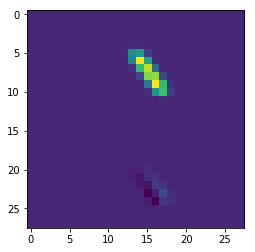

In [3]:
args = ObjectView(get_args())
data = get_dataset(args.name, args.save_dir, verbose=True, seed=args.seed, timesteps=100, trials=1)
plt.imshow(data['pixels'][0].reshape(28,28))

In [ ]:
# init model and optimizer
autoencoder = MLPAutoencoder(args.input_dim, args.hidden_dim, args.latent_dim,
                           nonlinearity='relu')
model = PixelHNN(args.latent_dim, args.hidden_dim,
               autoencoder=autoencoder, nonlinearity=args.nonlinearity,
               baseline=args.baseline)
print("Training baseline model:" if args.baseline else "Training HNN model:")
optim = torch.optim.Adam(model.parameters(), args.learn_rate)

# get dataset
data = get_dataset(args.name, args.save_dir, verbose=True, seed=args.seed)
trials = data['meta']['trials']
timesteps = data['meta']['timesteps']
inputs = torch.tensor( data['pixels'], dtype=torch.float32)
inputs_next = torch.tensor( data['next_pixels'], dtype=torch.float32)


In [ ]:
# vanilla ae train loop
for step in range(args.total_steps+1):
# select a batch
ixs = torch.randperm(trials*timesteps-2*trials)[:args.batch_size]
x = inputs[ixs]
x_next = inputs_next[ixs]

# encode pixel space -> latent dimension
z = model.encode(x)
z_next = model.encode(x_next)

# autoencoder loss
x_hat = model.decode(z)
ae_loss = L2_loss(x, x_hat)

# hnn vector field loss
noise = args.input_noise * torch.randn(*z.shape)
z_hat_next = z + model.time_derivative(z + noise)
hnn_loss = L2_loss(z_next, z_hat_next)

# canonical coordinate loss
# -> makes latent space look like (x, v) coordinates
w, dw = z.split(1,1)
w_next, _ = z_next.split(1,1)
cc_loss = L2_loss(dw, w_next - w)

# sum losses and take a gradient step
loss = cc_loss + ae_loss + 1e-2 * hnn_loss
loss.backward() ; optim.step() ; optim.zero_grad()

if step % 250 == 0:
  print("step {}, loss {:.4e}".format(step, loss.item()))